
Cross-Validation Accuracy Scores: [0.5923913  0.64130435 0.95652174 0.83152174 0.65217391]
Mean CV Accuracy: 0.7348
Standard Deviation: 0.1374

Test Set Evaluation Metrics:
Accuracy:  0.8478
Precision: 0.8716
Recall:    0.8716
F1-Score:  0.8716

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        75
           1       0.87      0.87      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184


Confusion Matrix:
[[61 14]
 [14 95]]


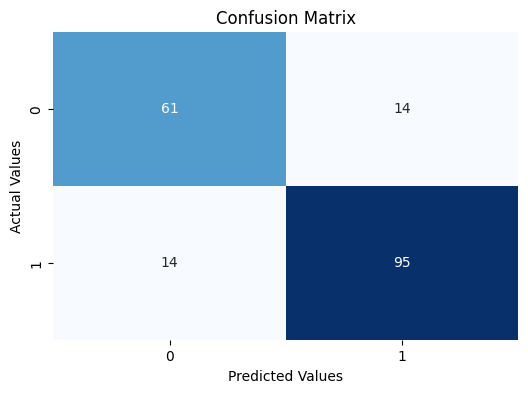

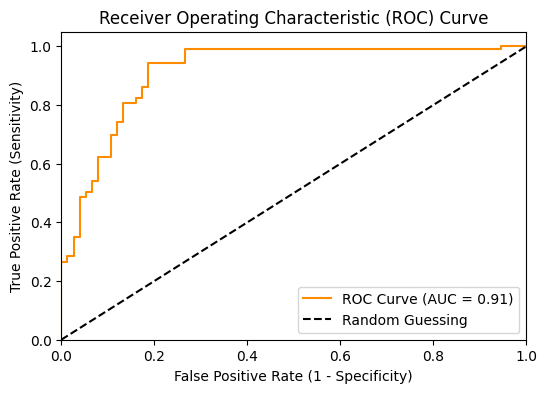

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, roc_auc_score
)

# Step 1: Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

# Step 2: Handle missing values (only for numeric columns)
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# Step 3: Separate features and target
X = df.drop(columns=['num'])  # Replace 'num' with actual target column name
y = df['num']                 # Replace with actual target column name

# Step 4: Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Step 5: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 6: Map target to binary if needed
y_binary = np.where(y > 0, 1, 0)  # Convert to binary classification

# Step 7: Cross-validation before training
svm_cv_model = SVC(kernel='linear', probability=True, random_state=42)
cv_scores = cross_val_score(svm_cv_model, X_scaled, y_binary, cv=5, scoring='accuracy')

print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard Deviation: {:.4f}".format(cv_scores.std()))

# Step 8: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

# Step 9: Train the final model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Step 10: Make predictions
y_pred = svm_model.predict(X_test)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print("\nTest Set Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Step 12: ROC Curve and AUC
y_probs = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


Accuracy:  0.5489
Precision: 0.5157
Recall:    0.5489
F1-Score:  0.5102


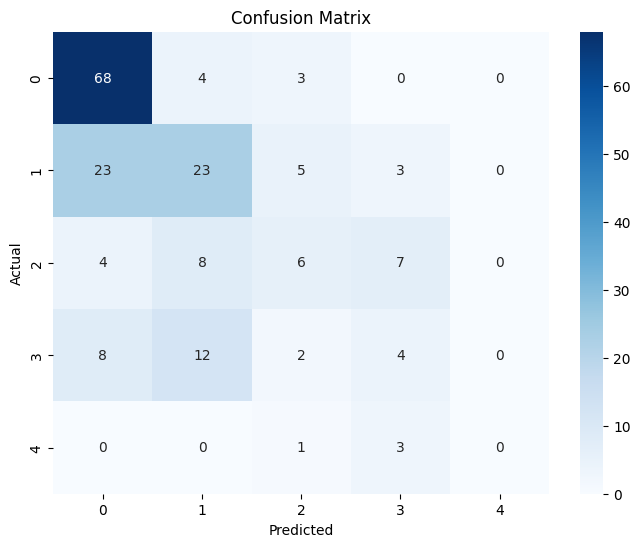


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.91      0.76        75
           1       0.49      0.43      0.46        54
           2       0.35      0.24      0.29        25
           3       0.24      0.15      0.19        26
           4       1.00      0.00      0.00         4

    accuracy                           0.55       184
   macro avg       0.55      0.35      0.34       184
weighted avg       0.52      0.55      0.51       184


Cross-Validation Scores (Accuracy for each fold): [0.5        0.5        0.58695652 0.375      0.23369565]
Mean CV Accuracy: 0.4391
Standard Deviation of CV Accuracy: 0.1229


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, classification_report,
    precision_score, recall_score, f1_score
)

# Step 1: Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

# Step 2: Handle missing values (if any)
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# Step 3: Separate features and target
X = df.iloc[:, 1:].drop(columns=['num'])  # Features
y = df['num']  # Target

# Step 4: Encode categorical variables (if present)
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42)

# Step 6: Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 7: Train the model
rf_classifier.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = rf_classifier.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Step 10: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 11: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Step 12: Cross-Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf_classifier, X_encoded, y, cv=5, scoring='accuracy')

print("\nCross-Validation Scores (Accuracy for each fold):", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(np.mean(cv_scores)))
print("Standard Deviation of CV Accuracy: {:.4f}".format(np.std(cv_scores)))
